In [11]:
import os 
import nibabel as nib 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import ants
import cv2 as cv2

In [24]:
insp = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/valid/inspiratory_BONE/COPDGene_D48362_BONE.nii.gz")
insp_img = insp.get_fdata()
exp = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/valid/expiratory_STANDARD/COPDGene_D48362_STANDARD.nii.gz")
exp_img = exp.get_fdata()
harm_insp = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/insp_exp_COPD_epoch5_val/COPDGene_D48362_BONE.nii.gz")
harm_insp_img = harm_insp.get_fdata()

midslice_insp = insp_img.shape[1]//2
midslice_exp = exp_img.shape[1]//2
midslice_harm = harm_insp_img.shape[1]//2

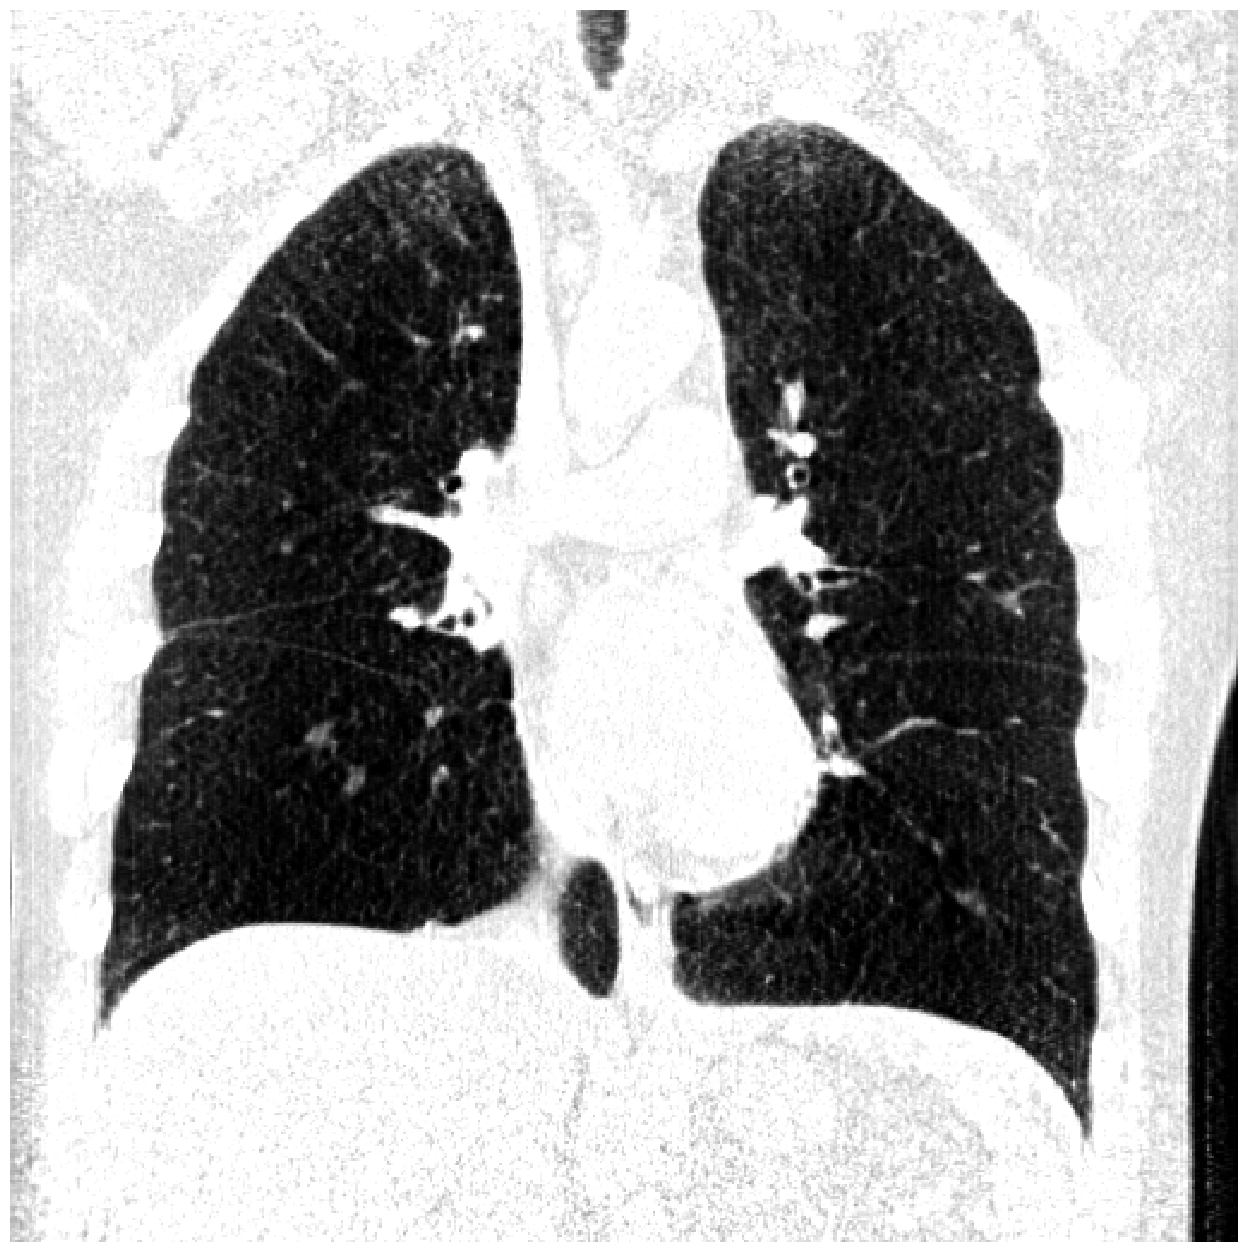

In [27]:
plt.figure(figsize=(16,16))
plt.imshow(np.rot90(harm_insp_img[:,midslice_harm, :]), cmap='gray', vmin=-1000, vmax=0)
plt.axis('off')
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/idea/harm_insp_img.tiff", dpi=300, format='tiff')
plt.show()

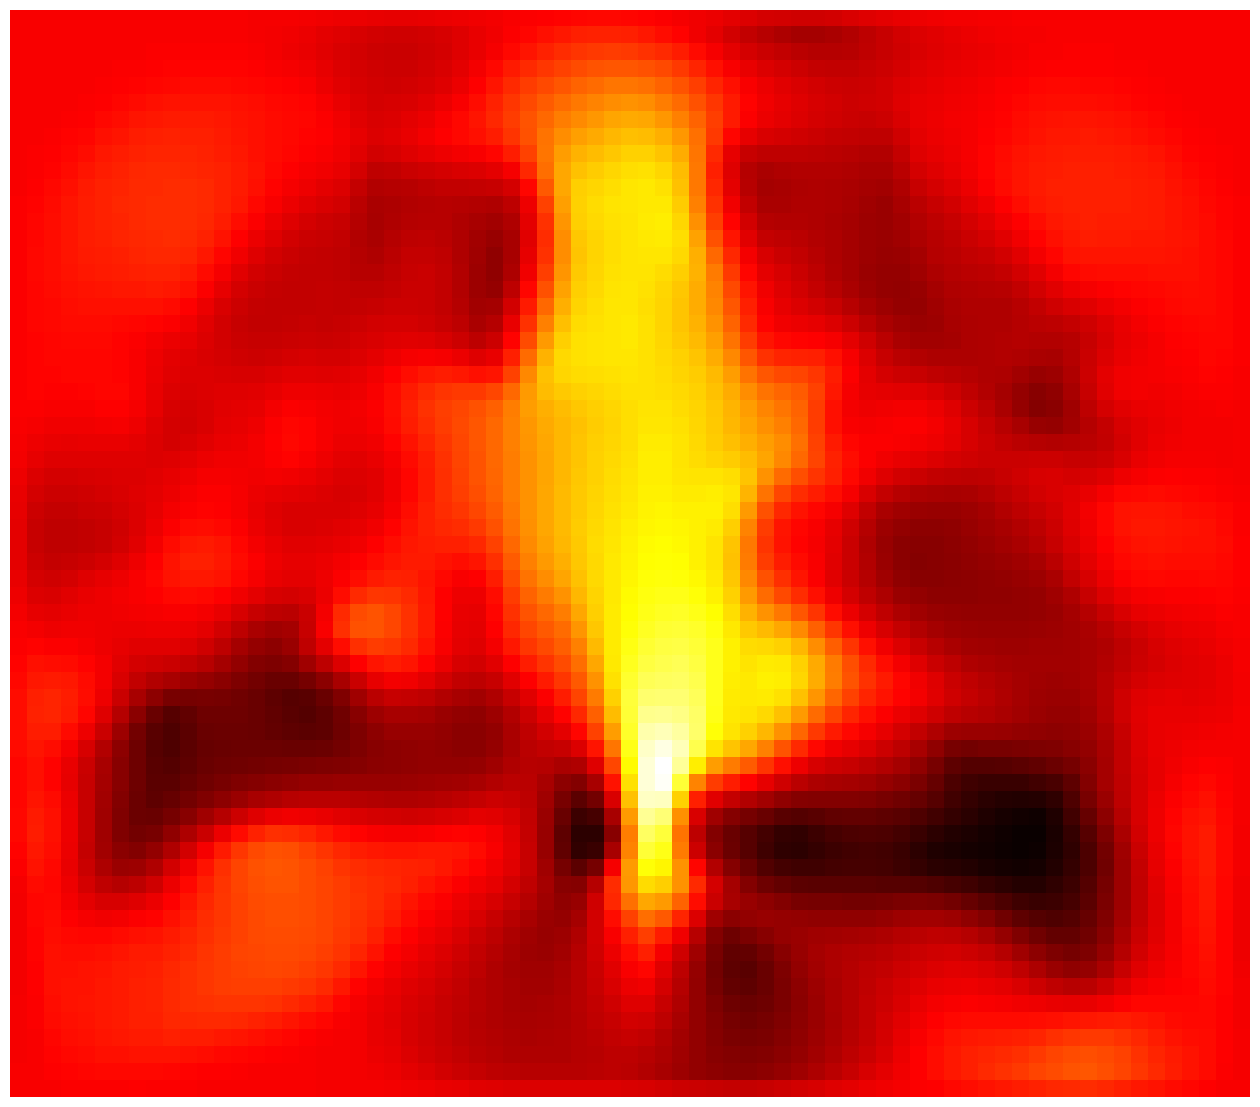

In [9]:
#Plot the log jacobian determinant 
log_jac = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized/masked_COPDGene_D48362_STANDARD/log_jacobian_det.nii.gz")
log_jac = log_jac.get_fdata()
mid_slice = log_jac.shape[1]//2
plt.figure(figsize=(16,16))
plt.imshow(np.rot90(log_jac[:,mid_slice, :]), cmap='hot')
plt.axis('off')
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/idea/log_jac.tiff", dpi=300, format='tiff')
plt.show()

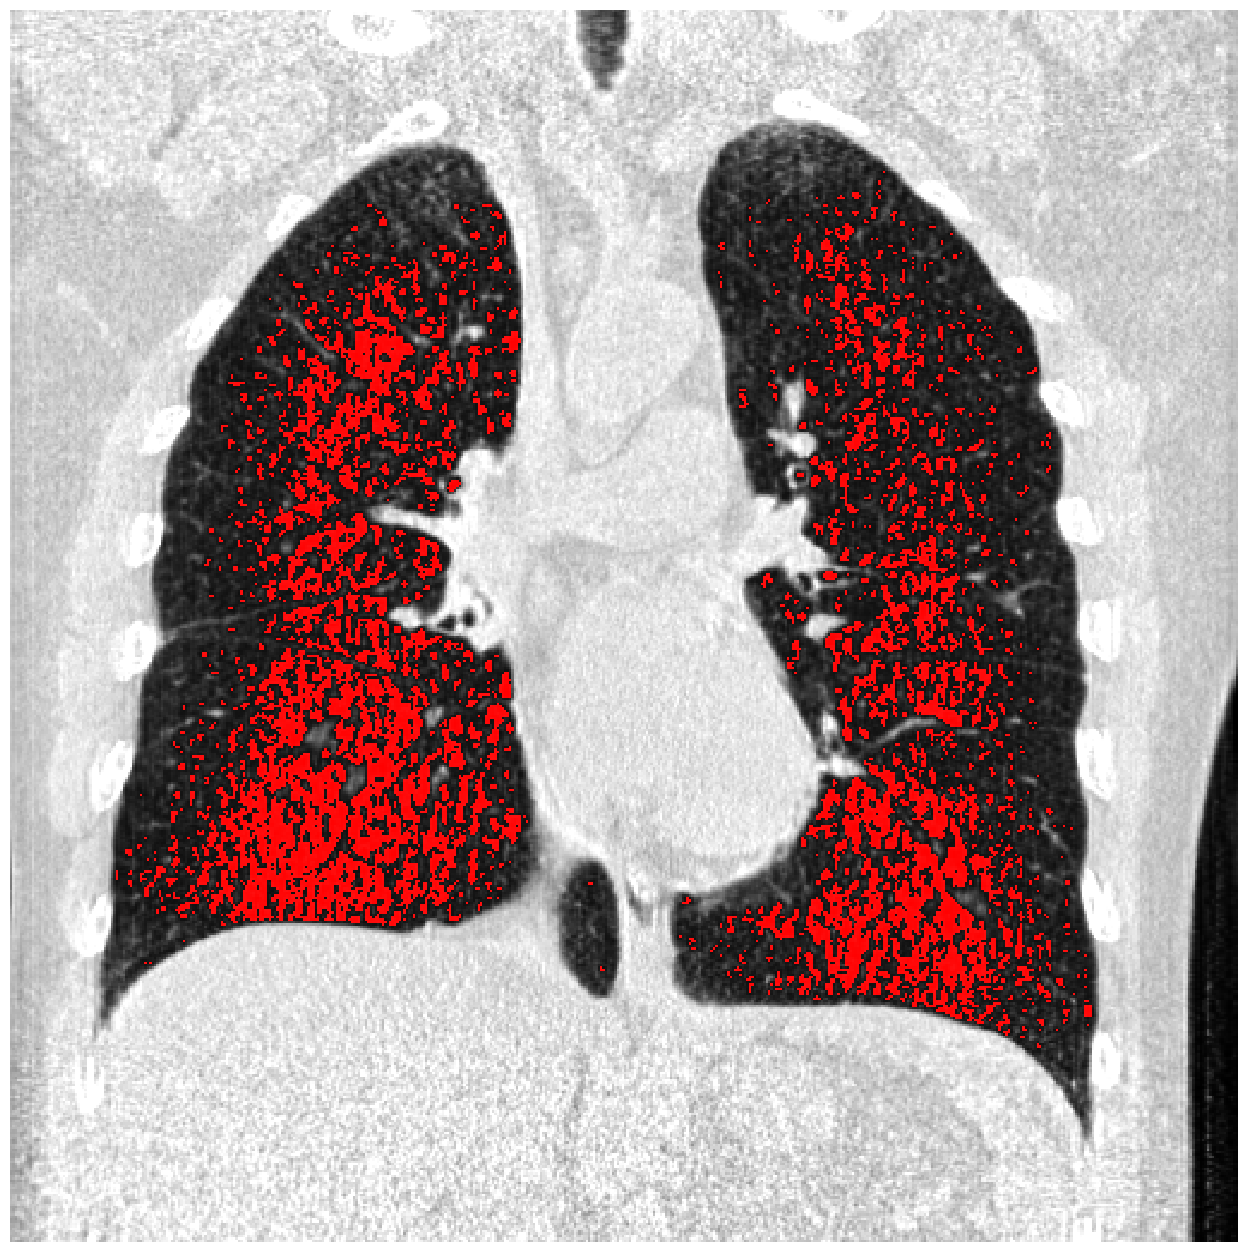

In [20]:
# Emphysema mask for the expiratory image
emph_mask = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema/COPDGene_D48362_BONE.nii.gz").get_fdata()

def overlay_mask(image, mask, color=(255, 0, 0), alpha=1.0):
    # Convert image to uint8
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Convert grayscale image to BGR
    image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2BGR)
    
    # Create a color mask
    color_mask = np.zeros_like(image_bgr)
    color_mask[mask == 1] = color
    
    # Overlay the color mask on the image
    overlay = cv2.addWeighted(image_bgr, 1, color_mask, alpha, 0)
    return overlay

def apply_lung_window(image, window_center=-600, window_width=1500):
    min_val = window_center - window_width // 2
    max_val = window_center + window_width // 2
    windowed_image = np.clip(image, min_val, max_val)
    return windowed_image

# Apply lung window to the inspiratory image
lung_window_image = apply_lung_window(harm_insp[:, midslice_insp, :])

# Overlay the emphysema mask on the lung windowed image
overlay = overlay_mask(lung_window_image, emph_mask[:, midslice_exp, :])
plt.figure(figsize=(16, 16))
plt.imshow(np.rot90(overlay))
plt.axis('off')
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/idea/emph_overlay.tiff", dpi=300, format='tiff')
plt.show()

In [28]:
#Registered images 
clipped_bone = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/images/clipped_masked_out_harmonized/masked_COPDGene_D48362_BONE.nii.gz").get_fdata()
clipped_std = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/images/clipped_masked_out_STANDARD/masked_COPDGene_D48362_STANDARD.nii.gz").get_fdata()
registerd = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized/masked_COPDGene_D48362_STANDARD/masked_COPDGene_D48362_STANDARD_Warped.nii.gz").get_fdata()



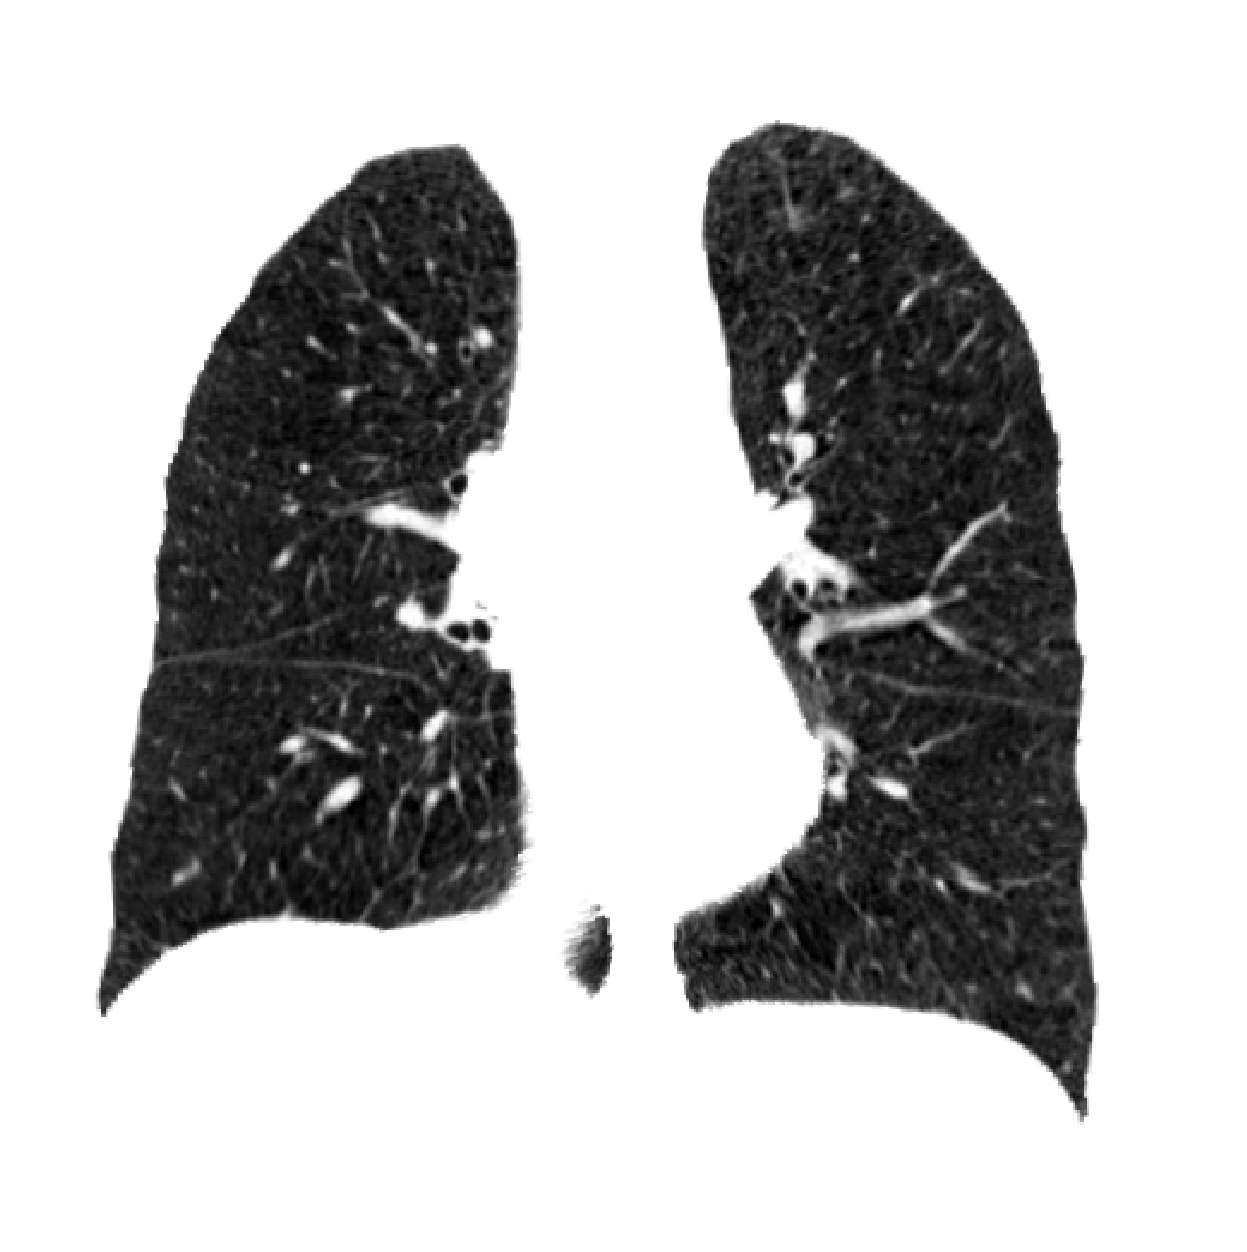

In [31]:
plt.figure(figsize=(16,16))
plt.imshow(np.rot90(registerd[:,midslice_harm, :]), cmap='gray', vmin=-1000, vmax=0)
plt.axis('off')
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/idea/reg_harm_img_masked.tiff", dpi=300, format='tiff')
plt.show()